In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split

In [166]:
inputFile="Churn_Modelling.csv"
inputDataFrame=pd.read_csv(inputFile)

## Exploring the Data

In [167]:
#checking the data size
inputDataFrame.shape

(10000, 14)

In [168]:

inputDataFrame.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [169]:
#Checking number of unique values in each columns
inputDataFrame.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Checking for Outliers

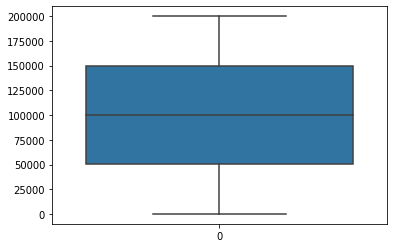

In [170]:
sns.boxplot(data=inputDataFrame['EstimatedSalary'])

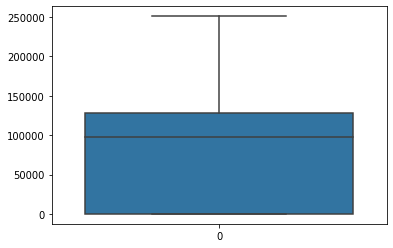

In [171]:
sns.boxplot(data=inputDataFrame['Balance'])

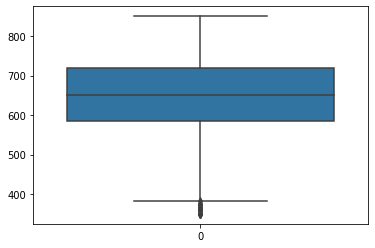

In [172]:
sns.boxplot(data=inputDataFrame['CreditScore'])

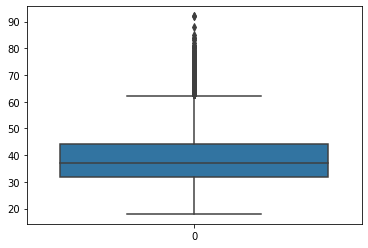

In [173]:
sns.boxplot(data=inputDataFrame['Age'])

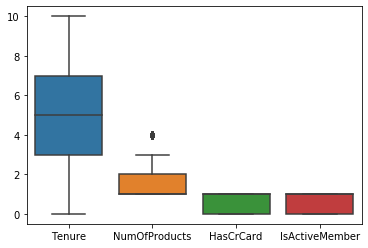

In [174]:
numericalColumns=['Tenure','NumOfProducts','HasCrCard','IsActiveMember']
sns.boxplot(data=inputDataFrame[numericalColumns])

There seems to be a 60 instances of data where NumberOfProducts is 4. This might be a potential cluster of valid datapoints and cannot be considered as outlier.


Age feature seems to have a few outliers. Age is one column which needs to be treated for outliers. 

(i) No Outliers in Estimated Salary
(ii) No Outliers in Balance
(iii) There are a cluster of data points outside the IQR but very close to the border and hence cannot be considered as Outliers
(iv)


In [175]:
#Checking for missing values
inputDataFrame.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Missing Values found

### Handling Categorical Data

There are two features in this dataset which is categorical. Both of the features are not nominal features and does not require any inherent ordering.

One Hot Encoder can be applied because the data does not have huge number of unique values in them. 


In [176]:
# One Hot Encoding
from sklearn.compose import ColumnTransformer
unprocessedDataX=inputDataFrame.drop(['CustomerId', 'RowNumber', 'Surname','Exited'], axis=1)
dataY=inputDataFrame.Exited
preprocessor= ColumnTransformer([('num',OneHotEncoder(sparse=False, categories='auto'),\
                                 categorialColumns)],remainder='passthrough')
transformedData= preprocessor.fit_transform(unprocessedDataX)
processedDataX=pd.DataFrame(data=transformedData)
processedDataX.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [201]:
beforeScaling_X=processedDataX
beforeScaling_y=dataY
def evaluate_performance(X,y):
    bs_train_X, bs_test_X, bs_train_y, bs_test_y = train_test_split(X, y, test_size = 0.20, random_state=1)
    clf = RandomForestClassifier()
    clf.fit(bs_train_X,bs_train_y)
    print("Accuracy:",clf.score(bs_test_X,bs_test_y))
    results=clf.predict(bs_test_X)
    print("Confusion Matrix:")
    confusionMatrix= metrics.confusion_matrix(y_true= bs_test_y, y_pred=results )
    print(confusionMatrix)
evaluate_performance(beforeScaling_X,beforeScaling_y)

Accuracy: 0.8565
Confusion Matrix:
[[1531   54]
 [ 233  182]]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Scaling Data

In [205]:
from sklearn import preprocessing
processedDataX.columns=[ 'geo_france','geo_germany','geo_spain' ,'gender_female','gender_male',\
                        'creditscore', 'age', 'tenure', 'balance','numofproducts', 'hascrcard', \
                        'isactivemember', 'estimatedsalary']
#Taking only the numerical columns for scaling and ignoring the categorical columns
num_columns=['creditscore', 'age', 'tenure', 'balance','numofproducts','estimatedsalary']

scaler = preprocessing.StandardScaler()
minmaxscaler = preprocessing.MinMaxScaler()
processedDataX[num_columns]= scaler.fit_transform(processedDataX[num_columns])

minmaxprocesseddata=minmaxscaler.fit_transform(processedDataX[num_columns])



In [206]:
#After scaling results
print("Standard scaled data")
standard_scaling_X=processedDataX
standard_scaling_y=dataY
evaluate_performance(standard_scaling_X,standard_scaling_y)
#MinMax Scaled data
print("Minmax scaled data")
minmax_scaling_X=minmaxprocesseddata
minmax_scaling_y=dataY
evaluate_performance(minmax_scaling_X,minmax_scaling_y)


Standard scaled data
Accuracy: 0.8485
Confusion Matrix:
[[1530   55]
 [ 248  167]]
Minmax scaled data


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.835
Confusion Matrix:
[[1522   63]
 [ 267  148]]


### Checking Imbalanced Data

In [178]:
dataY.columns=['target']

dataY.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

From the above output we could say that the data is imbalanced. 

### Feature Selection

In [179]:
from sklearn.feature_selection import RFECV
estimator = RandomForestClassifier(n_estimators=250, random_state=0)
rfecv= RFECV(estimator, cv=10)
rfecv.fit(processedDataX,dataY)

11
[1 1 2 1 3 1 1 1 1 1 1 1 1]


TypeError: '(slice(None, None, None), array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True]))' is an invalid key

In [183]:
# optimal number of features
print (rfecv.n_features_)
# ranking of each feature
print (rfecv.ranking_)
print(processedDataX.shape)
array_data=processedDataX.to_numpy()
reduced_X = array_data[ : , rfecv.support_ ]


11
[1 1 2 1 3 1 1 1 1 1 1 1 1]
(10000, 13)


In [203]:
#After Feature Selection results
print("After Feature Selection results")
after_feature_selection_X=reduced_X
after_feature_selection_y=dataY
evaluate_performance(after_feature_selection_X,after_feature_selection_y)

After Feature Selection results
Accuracy: 0.8545
Confusion Matrix:
[[1528   57]
 [ 234  181]]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Test Train Split

In [185]:
features=reduced_X
target=dataY

In [186]:
train_X, test_X, train_y, test_y = train_test_split(features, target, test_size = 0.20, random_state=1)

### Checking the model performance before balancing the data

In [187]:
print(test_y.value_counts(normalize=True))
clf = RandomForestClassifier()
clf.fit(train_X,train_y)
print("Accuracy:",clf.score(test_X,test_y))
results=clf.predict(test_X)
print("Confusion Matrix:")
confusionMatrix= metrics.confusion_matrix(y_true= test_y, y_pred=results )
print(confusionMatrix)

0    0.7925
1    0.2075
Name: Exited, dtype: float64
Accuracy: 0.852
Confusion Matrix:
[[1525   60]
 [ 236  179]]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Model Creation

In [188]:
classifiers=[LinearSVC(),\
             KNeighborsClassifier(),\
             DecisionTreeClassifier(),\
             LogisticRegression(),\
             GaussianNB(),\
             RandomForestClassifier(),\
             AdaBoostClassifier(),\
             NearestCentroid()]
for c in classifiers:
    
    c.fit(train_X, train_y)
    print("Prediction Score:",c.score(test_X,test_y))
    
    ###Confusion Matrix implemetation
    results=c.predict(test_X)
    cmatrix= metrics.confusion_matrix(y_true= test_y, y_pred=results )
    print(cmatrix)
    


Prediction Score: 0.8095
[[1557   28]
 [ 353   62]]
Prediction Score: 0.8385
[[1507   78]
 [ 245  170]]
Prediction Score: 0.8
[[1381  204]
 [ 196  219]]
Prediction Score: 0.812
[[1533   52]
 [ 324   91]]
Prediction Score: 0.823
[[1505   80]
 [ 274  141]]
Prediction Score:

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 0.8545
[[1527   58]
 [ 233  182]]
Prediction Score: 0.8585
[[1523   62]
 [ 221  194]]
Prediction Score: 0.7235
[[1153  432]
 [ 121  294]]


### Balancing the data

In [189]:

sm = SMOTE(random_state=0)
balanced_X, balanced_y = sm.fit_sample(train_X, train_y)

In [190]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn import metrics
import numpy as np
kf = model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

def cross_validation_scores(X,y):
    accuracy=[]
    for c in classifiers:

        allResults=[] 
        totalConfusionMatrix= np.zeros((2,2))

        for train_index, test_index in kf.split(X, y):  

            c.fit(X[train_index], y[train_index])
            results=c.predict(X[test_index])
            allResults.append(c.score(X[test_index],y[test_index]))            
            confusionMatrix= metrics.confusion_matrix(y_true= y[test_index], y_pred=results )
            totalConfusionMatrix+= confusionMatrix

        print("\nAccuracy:",np.mean(allResults))
        print (totalConfusionMatrix)
        accuracy.append(np.mean(allResults))
    
    return accuracy
    
    

cross_validation_scores(balanced_X,balanced_y)




Accuracy: 0.7042960175603636
[[4542. 1836.]
 [1936. 4442.]]

Accuracy: 0.8494825964252116
[[4747. 1631.]
 [ 289. 6089.]]

Accuracy: 0.839448102853559
[[5294. 1084.]
 [ 964. 5414.]]

Accuracy: 0.705236751332706
[[4532. 1846.]
 [1914. 4464.]]


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages


Accuracy: 0.7191125744747571
[[4739. 1639.]
 [1944. 4434.]]

Accuracy: 0.8949513954217623
[[5840.  538.]
 [ 802. 5576.]]

Accuracy: 0.8297271872060206
[[5352. 1026.]
 [1146. 5232.]]

Accuracy: 0.6999843211037944
[[4530. 1848.]
 [1979. 4399.]]


In [191]:

training_X=balanced_X
training_y=balanced_y

### Hyperparameter Tuning

From the cross hold validation we can see that the below models performed well

 1. KNearestNeighbors()
 2. Decision Tree Classifier()
 3. RandomForestClassifier() 

In [193]:
from sklearn.model_selection import GridSearchCV

def gridsearch(param_grid, clf, train_X, train_y):
    classifier=GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
    classifier.fit(train_X,train_y)
    print("\n Best parameters set found on development set:")
    print(classifier.best_params_ , "with a score of ", classifier.best_score_)

knn_pgrid = {'n_neighbors': list(range(1, 20)),  'p':[1, 2, 3, 4, 5] }
rfc_pgrid = {'n_estimators': list(range(90, 110)),  'criterion':['gini', 'entropy'] }
dtc_pgrid = {'criterion':['gini', 'entropy'], 'splitter':['best','random']}
print("KNeighbors classifier")
gridsearch(knn_pgrid, KNeighborsClassifier(), training_X,training_y)
print("Random Forest Classifier")
gridsearch(rfc_pgrid, RandomForestClassifier(), training_X,training_y)
print("Decision Tree Classifier")
gridsearch(dtc_pgrid, DecisionTreeClassifier(), training_X,training_y)



KNeighbors classifier

 Best parameters set found on development set:
{'n_neighbors': 1, 'p': 1} with a score of  0.9132173095014111
Random Forest Classifier

 Best parameters set found on development set:
{'criterion': 'entropy', 'n_estimators': 102} with a score of  0.9157259328943242
Decision Tree Classifier

 Best parameters set found on development set:
{'criterion': 'entropy', 'splitter': 'random'} with a score of  0.8573220445280653


### Applying the model with and without the ideal hyper parameter settings on Test data

In [198]:
classifiers_without_hyperparameter_optimization=[KNeighborsClassifier(),\
                  RandomForestClassifier(),\
                  DecisionTreeClassifier()]
finalclassifiers=[KNeighborsClassifier(n_neighbors=1,p=1),\
                  RandomForestClassifier(criterion='entropy', n_estimators=102),\
                  DecisionTreeClassifier(criterion='entropy', splitter='random')]

In [199]:


def get_results(classifiers, training_X, training_y, test_X, test_y):
    for classifier in classifiers:
        classifier.fit(training_X,training_y)
        print(classifier.score(test_X, test_y))
        results=classifier.predict(test_X)
        confusionMatrix= metrics.confusion_matrix(y_true= test_y, y_pred=results)
        print(confusionMatrix)

print("Results before hyperparameter optimization\n")
get_results(classifiers_without_hyperparameter_optimization, training_X, training_y, test_X, test_y)
print("Results after hyperparameter optimization\n")
get_results(finalclassifiers, training_X, training_y, test_X, test_y)

Results before hyperparameter optimization

0.775
[[1259  326]
 [ 124  291]]
0.845
[[1475  110]
 [ 200  215]]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7815
[[1344  241]
 [ 196  219]]
Results after hyperparameter optimization

0.804
[[1398  187]
 [ 205  210]]
0.852
[[1475  110]
 [ 186  229]]
0.7805
[[1339  246]
 [ 193  222]]
